In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.stats.multicomp

%pip install bioinfokit
from bioinfokit.analys import stat

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [3]:
### Loading and Reading data file ###
Data = pd.read_csv("INF2178_A3_data.csv")

In [4]:
# Checking structure of data frame
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [5]:
# Checking for any missing values
Data.isna().any()

fallreadingscore               False
fallmathscore                  False
fallgeneralknowledgescore      False
springreadingscore             False
springmathscore                False
springgeneralknowledgescore    False
totalhouseholdincome           False
incomeinthousands              False
incomegroup                    False
dtype: bool

In [6]:
# Convert income group to category 
Data['incomegroup'] = Data['incomegroup'].astype('object') 

In [7]:
# Rename columns for readability (Note : GK - General Knowledge) 

dict = {'fallreadingscore': 'Fall_Reading_Score',
        'fallmathscore': 'Fall_Math_Score',
        'fallgeneralknowledgescore': 'Fall_GK_Score', 
        'springreadingscore': 'Spring_Reading_Score',
        'springmathscore': 'Spring_Math_Score',
        'springgeneralknowledgescore': 'Spring_GK_Score'}

Data.rename(columns=dict,
          inplace=True)

In [8]:
#### Summary Stats of the GK, Reading and Math Scores ####

## Using function to display table side by side 
import pandas as pd
from IPython.display import HTML

def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))


### For Fall 1998

## General Knowledge
# Creating base descriptive stats df
Summary_Stats_DF_Fall_GK = pd.DataFrame(Data['Fall_GK_Score'].describe())

# Relabelling index names 
Summary_Stats_DF_Fall_GK = Summary_Stats_DF_Fall_GK.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF_Fall_GK = Summary_Stats_DF_Fall_GK.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])



## Reading
# Creating base descriptive stats df
Summary_Stats_DF_Fall_Reading = pd.DataFrame(Data['Fall_Reading_Score'].describe())

# Relabelling index names 
Summary_Stats_DF_Fall_Reading = Summary_Stats_DF_Fall_Reading.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF_Fall_Reading = Summary_Stats_DF_Fall_Reading.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])



## Math
# Creating base descriptive stats df
Summary_Stats_DF_Fall_Math = pd.DataFrame(Data['Fall_Math_Score'].describe())

# Relabelling index names 
Summary_Stats_DF_Fall_Math = Summary_Stats_DF_Fall_Math.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF_Fall_Math = Summary_Stats_DF_Fall_Math.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])




### For Spring 1999

## General Knowledge
# Creating base descriptive stats df
Summary_Stats_DF_Spring_GK = pd.DataFrame(Data['Spring_GK_Score'].describe())

# Relabelling index names 
Summary_Stats_DF_Spring_GK = Summary_Stats_DF_Spring_GK.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF_Spring_GK = Summary_Stats_DF_Spring_GK.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])



## Reading
# Creating base descriptive stats df
Summary_Stats_DF_Spring_Reading = pd.DataFrame(Data['Spring_Reading_Score'].describe())

# Relabelling index names 
Summary_Stats_DF_Spring_Reading = Summary_Stats_DF_Spring_Reading.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF_Spring_Reading = Summary_Stats_DF_Spring_Reading.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])



## Math
# Creating base descriptive stats df
Summary_Stats_DF_Spring_Math = pd.DataFrame(Data['Spring_Math_Score'].describe())

# Relabelling index names 
Summary_Stats_DF_Spring_Math = Summary_Stats_DF_Spring_Math.rename(index={'count': 'Count', 
                                                  'mean': 'Mean', 
                                                  '50%': 'Median', 
                                                  'std': 'Standard Deviation', 
                                                  'min': 'Minimum', 
                                                  'max': 'Maximum', 
                                                  '25%': 'Quartile 1',
                                                  '75%': 'Quartile 3'})

# Reordering DF index for readability 
Summary_Stats_DF_Spring_Math = Summary_Stats_DF_Spring_Math.reindex(index=['Count', 'Mean', 'Standard Deviation',
                                                   'Median', 'Minimum', 'Maximum', 
                                                  'Quartile 1', 'Quartile 3'])

# Display Fall 1998 Scores
side_by_side(Summary_Stats_DF_Fall_GK, Summary_Stats_DF_Fall_Reading, Summary_Stats_DF_Fall_Math)

# Display Spring 1999 Scores
side_by_side(Summary_Stats_DF_Spring_GK, Summary_Stats_DF_Spring_Reading, Summary_Stats_DF_Spring_Math)

,Fall_GK_Score
Count,11933.000000
Mean,23.073694
Standard Deviation,7.396978
Median,22.954000
Minimum,6.985000
Maximum,47.691000
Quartile 1,17.385000
Quartile 3,28.305000
,Fall_Reading_Score
Count,11933.000000


,Spring_GK_Score
Count,11933.000000
Mean,28.235584
Standard Deviation,7.577457
Median,28.583000
Minimum,7.858000
Maximum,48.345000
Quartile 1,22.802000
Quartile 3,33.782000
,Spring_Reading_Score
Count,11933.000000


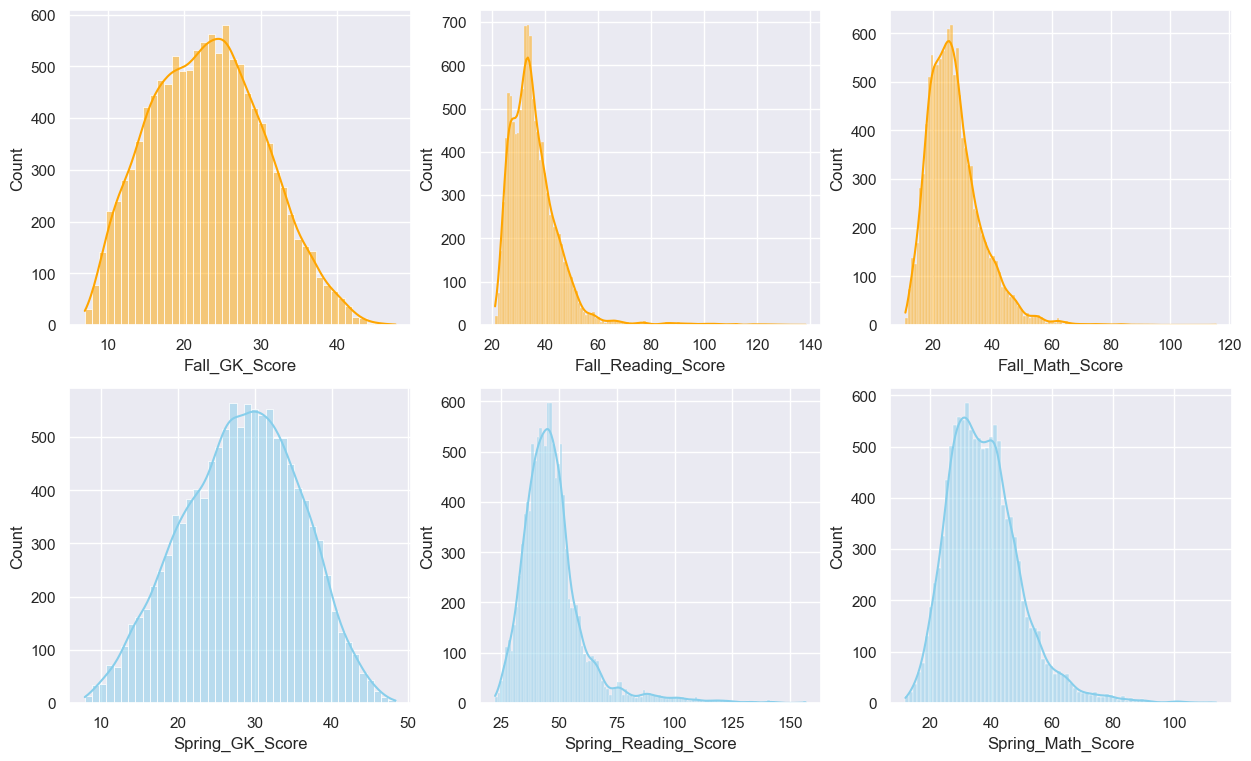

In [9]:
### Distribution of GK, Reading and Math Scores across both semesters ###

# Setting plot dimensions 
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Plotting fall scores
sns.histplot(data=Data, x="Fall_GK_Score", kde=True, color="orange", ax=axs[0, 0])
sns.histplot(data=Data, x="Fall_Reading_Score", kde=True, color="orange", ax=axs[0, 1])
sns.histplot(data=Data, x="Fall_Math_Score", kde=True, color="orange", ax=axs[0, 2])

# Plotting spring scores
sns.histplot(data=Data, x="Spring_GK_Score", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=Data, x="Spring_Reading_Score", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=Data, x="Spring_Math_Score", kde=True, color="skyblue", ax=axs[1, 2])


# Display plot
plt.show()

incomegroup
1    4729
2    3726
3    3478
Name: count, dtype: int64

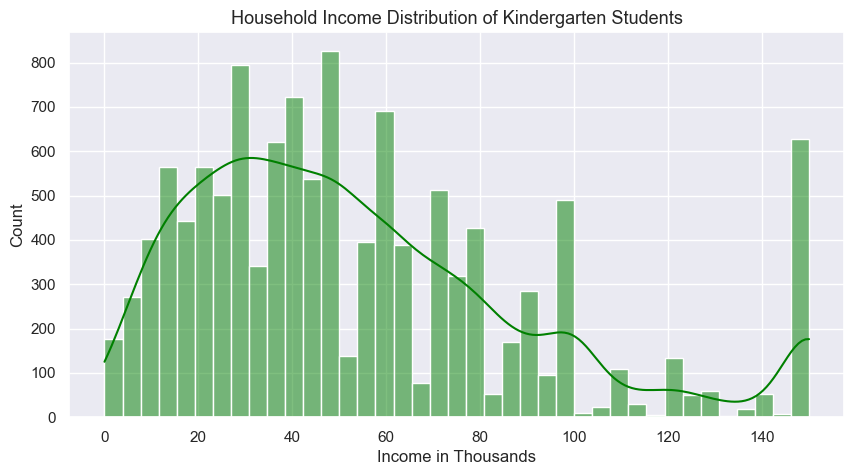

In [10]:
### Overall Income Distribution ###

## Frequency of each unique income group 
Income_Group_Counts = Data['incomegroup'].value_counts()
display(Income_Group_Counts)

## Overall distribution of income in each bin

# Setting plot dimensions 
plt.figure(figsize=(10, 5))

# Plotting income in thousands as histogram
sns.histplot(data=Data, x="incomeinthousands", kde=True, color="green")

# Adding title and axis names
plt.xlabel('Income in Thousands',size = 12) 
plt.ylabel('Count',size = 12) 
plt.title('Household Income Distribution of Kindergarten Students', size = 13) 

# Display graph
plt.show()

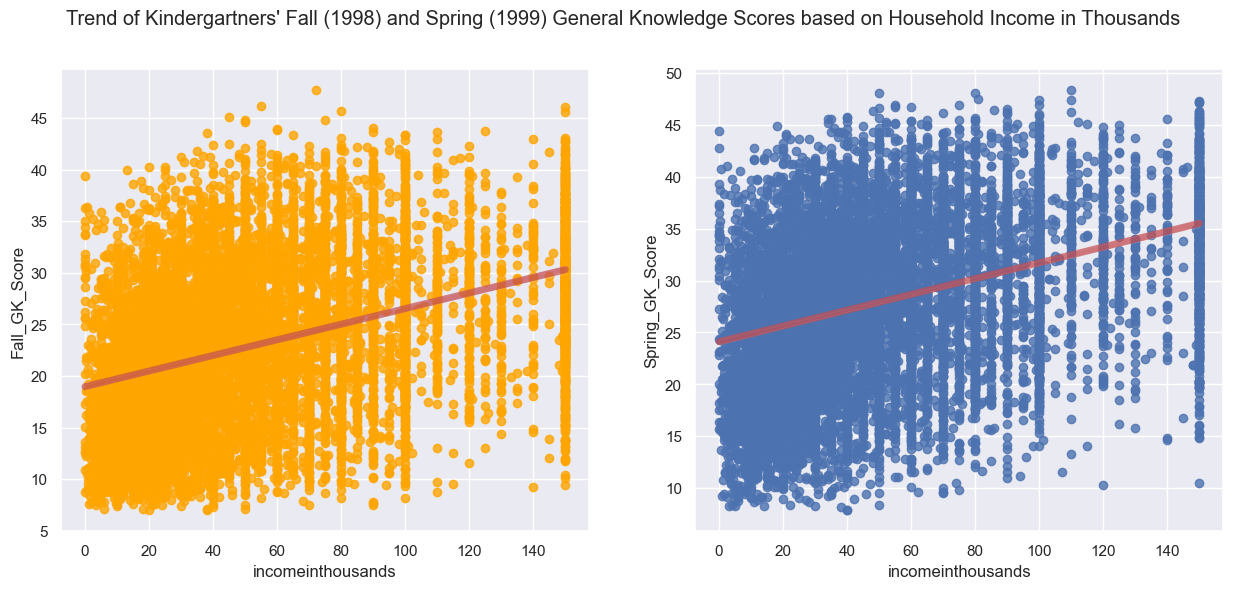

In [11]:
### Scatter Plot to study the trend between household income and kindergartners' general knowledge score for both semesters ###

# Setting plot dimensions 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Fall GK Score against total household income
sns.regplot( x=Data["incomeinthousands"], y=Data["Fall_GK_Score"],color = 'orange', 
    line_kws={"color": "r", 
             "alpha": 0.7,
        "lw": 5}, ax=ax[0])

# Plotting Spring GK Score against total household income
sns.regplot( x=Data["incomeinthousands"], y=Data["Spring_GK_Score"],
    line_kws={"color": "r", 
             "alpha": 0.7,
        "lw": 5}, ax=ax[1])

# Adding Title
plt.suptitle("Trend of Kindergartners' Fall (1998) and Spring (1999) General Knowledge Scores based on Household Income in Thousands")


# Display plot
plt.show()

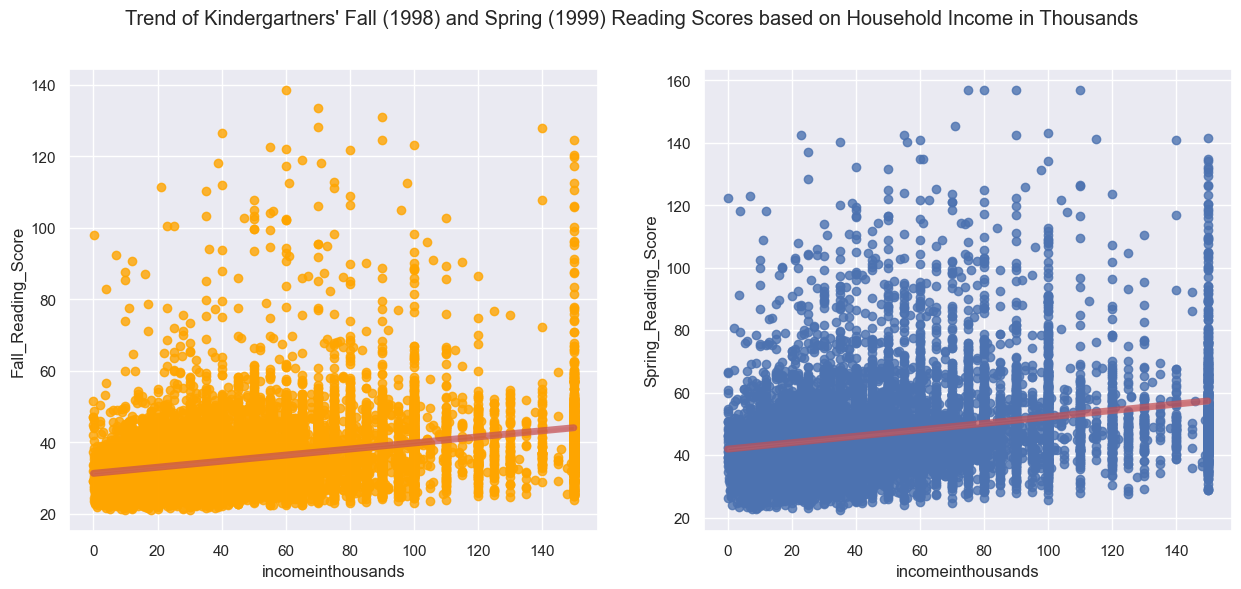

In [12]:
### Scatter Plot to study the trend between household income and kindergartners' reading scores for both semesters ###

# Setting plot dimensions 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Fall GK Score against total household income
sns.regplot( x=Data["incomeinthousands"], y=Data["Fall_Reading_Score"],color = 'orange', 
    line_kws={"color": "r", 
             "alpha": 0.7,
        "lw": 5}, ax=ax[0])

# Plotting Spring GK Score against total household income
sns.regplot( x=Data["incomeinthousands"], y=Data["Spring_Reading_Score"],
    line_kws={"color": "r", 
             "alpha": 0.7,
        "lw": 5}, ax=ax[1])

# Adding Title
plt.suptitle("Trend of Kindergartners' Fall (1998) and Spring (1999) Reading Scores based on Household Income in Thousands")


# Display plot
plt.show()

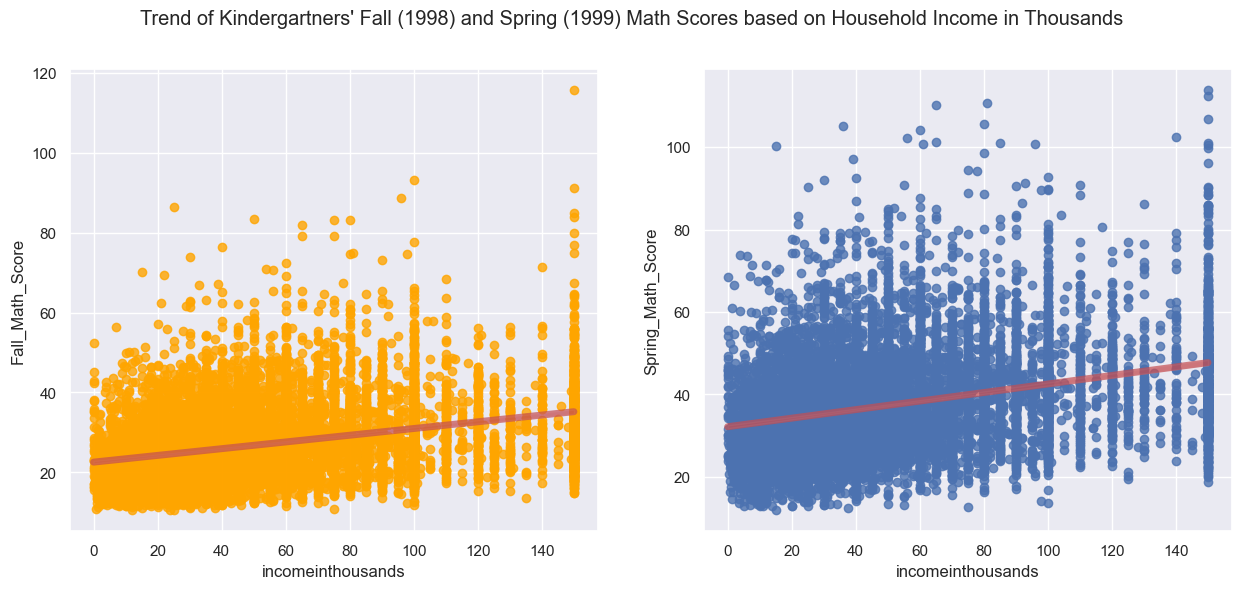

In [13]:
### Scatter Plot to study the trend between household income and kindergartners' math scores for both semesters ###

# Setting plot dimensions 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Fall GK Score against total household income
sns.regplot( x=Data["incomeinthousands"], y=Data["Fall_Math_Score"],color = 'orange', 
    line_kws={"color": "r", 
             "alpha": 0.7,
        "lw": 5}, ax=ax[0])

# Plotting Spring GK Score against total household income
sns.regplot( x=Data["incomeinthousands"], y=Data["Spring_Math_Score"],
    line_kws={"color": "r", 
             "alpha": 0.7,
        "lw": 5}, ax=ax[1])

# Adding Title
plt.suptitle("Trend of Kindergartners' Fall (1998) and Spring (1999) Math Scores based on Household Income in Thousands")


# Display plot
plt.show()

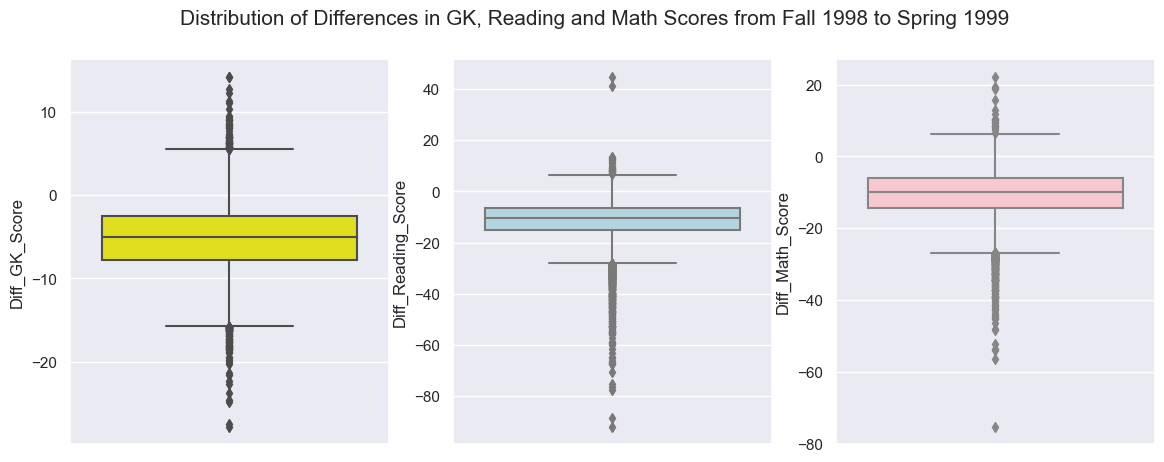

In [14]:
### Distribution of difference in each score category based on fall and spring semesters ###

## Creating new variables for delta values for Math, Reading and GK Scores 
Data['Diff_GK_Score'] = Data['Fall_GK_Score'] - Data['Spring_GK_Score']
Data['Diff_Reading_Score'] = Data['Fall_Reading_Score'] - Data['Spring_Reading_Score']
Data['Diff_Math_Score'] = Data['Fall_Math_Score'] - Data['Spring_Math_Score']

## Plotting their distribution using boxplot
# Setting plot dimensions 
fig, axs = plt.subplots(ncols=3, figsize = (14, 5))

# Plotting boxplots
sns.boxplot(y=Data["Diff_GK_Score"], ax = axs[0], color = 'yellow')
sns.boxplot(y=Data["Diff_Reading_Score"], ax = axs[1], color = 'lightblue')
sns.boxplot(y=Data["Diff_Math_Score"], ax = axs[2], color = 'pink')

# Adding title 
plt.suptitle("Distribution of Differences in GK, Reading and Math Scores from Fall 1998 to Spring 1999", size = 15)

# Displaying plot
plt.show();


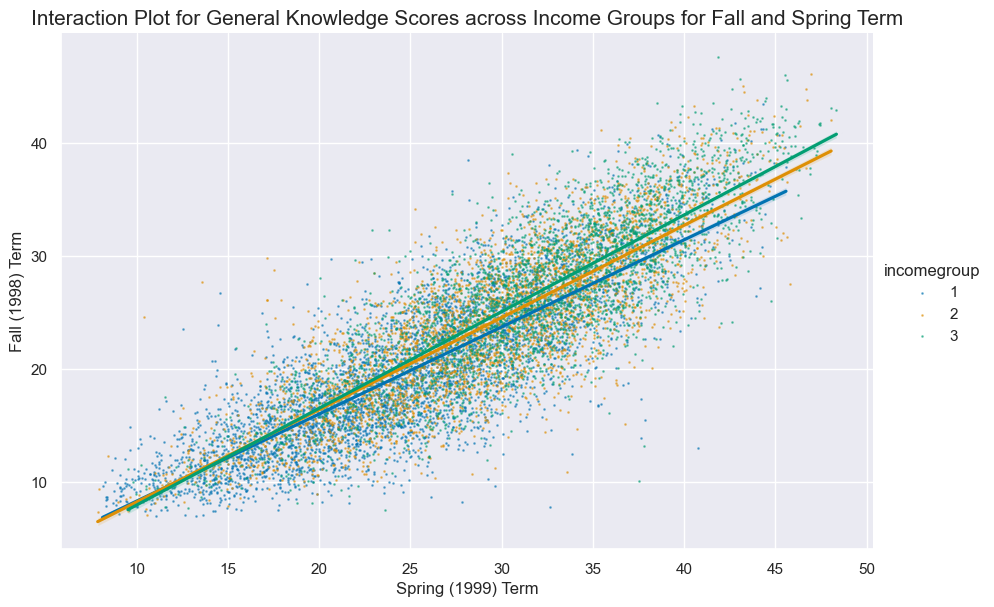

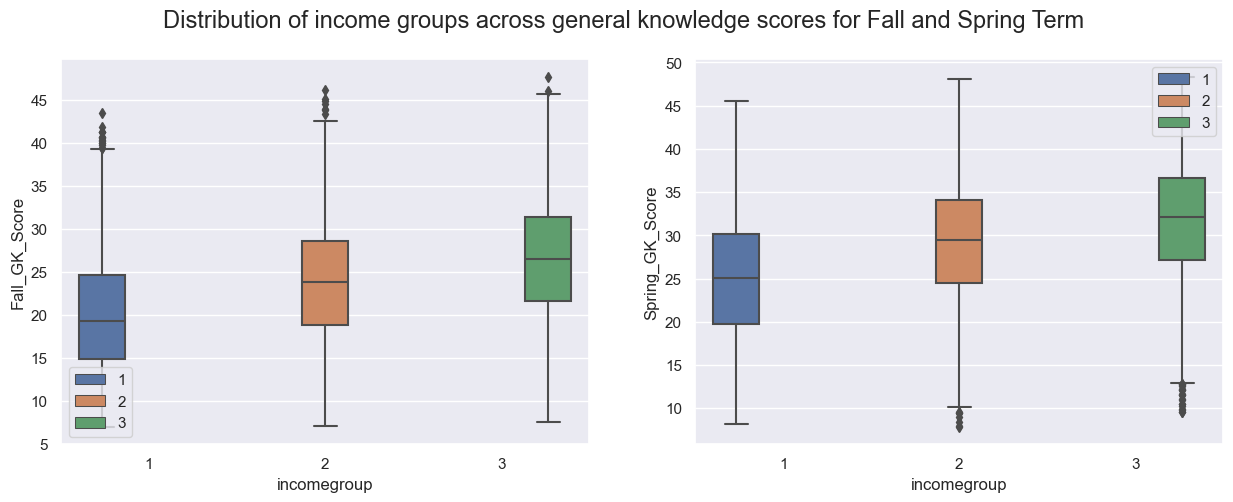

In [15]:
##### One Way ANCOVA - I ######

### To see if the kindergartners' spring general knowledge score is affected by the income group, controlling for the effect of general knowledge scores during fall  ###


# Null hypothesis: Means of all kindergartner's spring general knowledge scores based on each income group are equal after controlling the effect of kindergartners' fall general knowledge score i.e. adjusted means are equal
# Alternative hypothesis: At least, one kindergartner's spring general knowledge score for an income group is different from other income groups after controlling the effect of kindergartners' fall general knowledge score i.e. adjusted means are not equal

# Subsetting base dataframe for relevant columns
Data_I = Data[['incomegroup', 'Fall_GK_Score', 'Spring_GK_Score']]

# Plotting interaction plot 
sns.lmplot(data=Data_I, x='Spring_GK_Score', y='Fall_GK_Score', hue='incomegroup', palette='colorblind', 
           height=6, aspect=1.5, scatter_kws={'s': 0.9, 'alpha': 0.5})

# Adding labels
plt.title("Interaction Plot for General Knowledge Scores across Income Groups for Fall and Spring Term", size = 15)
plt.xlabel("Spring (1999) Term")
plt.ylabel("Fall (1998) Term")

# Displaying plot
plt.show();

# Adding space between outputs 
print(" ")
print(" ")
print(" ")

# Distribution of income group and general knowledge scores across terms
# Setting plot dimensions 
fig, axs = plt.subplots(ncols=2, figsize = (15, 5))

# Plotting relevant variables
sns.boxplot(data=Data_I, x="incomegroup", y="Fall_GK_Score", hue=Data_I.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=Data_I, x="incomegroup", y="Spring_GK_Score", hue=Data_I.incomegroup.tolist(), ax=axs[1])

# Adding title 
plt.suptitle("Distribution of income groups across general knowledge scores for Fall and Spring Term", size = 17)

# Displaying plot
plt.show();



In [16]:
# Perform the ANCOVA using ols
model_I = ols('Spring_GK_Score ~ Fall_GK_Score + incomegroup', data=Data_I).fit()

# Printing the summary of the model
print(model_I.summary())

                            OLS Regression Results                            
Dep. Variable:        Spring_GK_Score   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 1.082e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:49:36   Log-Likelihood:                -33259.
No. Observations:               11933   AIC:                         6.653e+04
Df Residuals:                   11929   BIC:                         6.656e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0303      0.119  

In [17]:
# ANCOVA Results Table using ancova
from pingouin import ancova

ancova(data=Data_I, dv='Spring_GK_Score', covar='Fall_GK_Score', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,Fall_GK_Score,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [18]:
# Post hoc Testing using Tukey-HSD test
res_I = stat()
res_I.tukey_hsd(df = Data_I, res_var = 'Spring_GK_Score', xfac_var = 'incomegroup', 
                anova_model = 'Spring_GK_Score ~ C(incomegroup)')
res_I.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3,2,2.424113,2.033481,2.814744,20.571127,0.001
1,3,1,6.498225,6.128133,6.868317,58.204679,0.001
2,2,1,4.074112,3.711187,4.437038,37.212445,0.001


In [19]:
### Assumption Testing ###

# Assumption 1: Residuals are normally distributed; testing using Shapiro Wilk test

# H0: Data is normally distributed
# H1: Data is not normally distributed

w_I_normality, pvalue_I_normality = stats.shapiro(model_I.resid)

# Defining level of significance
level_of_sig = 0.05
w_I_normality = round(w_I_normality, 3)
pvalue_I_normality = round(pvalue_I_normality, 3)

print('Shapiro-Wilk Test for Normality - (Spring GK - Fall GK and Income Groups)')
# Printing results
print(' Test statistic :', w_I_normality)

if(pvalue_I_normality == 0.0):
    print(' p-value < 0.001')
else:
    print(' p-value :',pvalue_I_normality)    


# Adding space between the outputs 
print(' ')

# Printing conclusion of test
if(pvalue_I_normality < level_of_sig):
    print(" Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the data is not normally distributed")
else:
    print(" Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the data is not normally distributed")   

## Adding space between outputs 
print(" ")
print(" ")
print(" ")

# Assumption 2: Homogeneity of variances ; testing using Levene's test as data is not normally distributed

# H0: Groups have equal variances
# H1: Groups do not equal variances

w_I_varhomogeneity, pvalue_I_varhomogeneity = levene(Data_I['Spring_GK_Score'], model_I.resid)

# Defining level of significance
level_of_sig = 0.05
w_I_varhomogeneity = round(w_I_varhomogeneity, 3)
pvalue_I_varhomogeneity = round(pvalue_I_varhomogeneity, 3)

print("Levene's Test of Homogeneity of Variances - (Spring GK - Fall GK and Income Groups) ")
# Printing results
print(' Test statistic :', w_I_varhomogeneity)

if(pvalue_I_varhomogeneity == 0.0):
    print(' p-value < 0.001')
else:
    print(' p-value :',pvalue_I_varhomogeneity)    


# Adding space between the outputs 
print(' ')


# Printing conclusion of test
if(pvalue_I_varhomogeneity < level_of_sig):
    print(" Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the variances are not homogeneous")
else:
    print(" Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")   





Shapiro-Wilk Test for Normality - (Spring GK - Fall GK and Income Groups)
 Test statistic : 0.998
 p-value < 0.001
 
 Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the data is not normally distributed
 
 
 
Levene's Test of Homogeneity of Variances - (Spring GK - Fall GK and Income Groups) 
 Test statistic : 4572.025
 p-value < 0.001
 
 Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the variances are not homogeneous


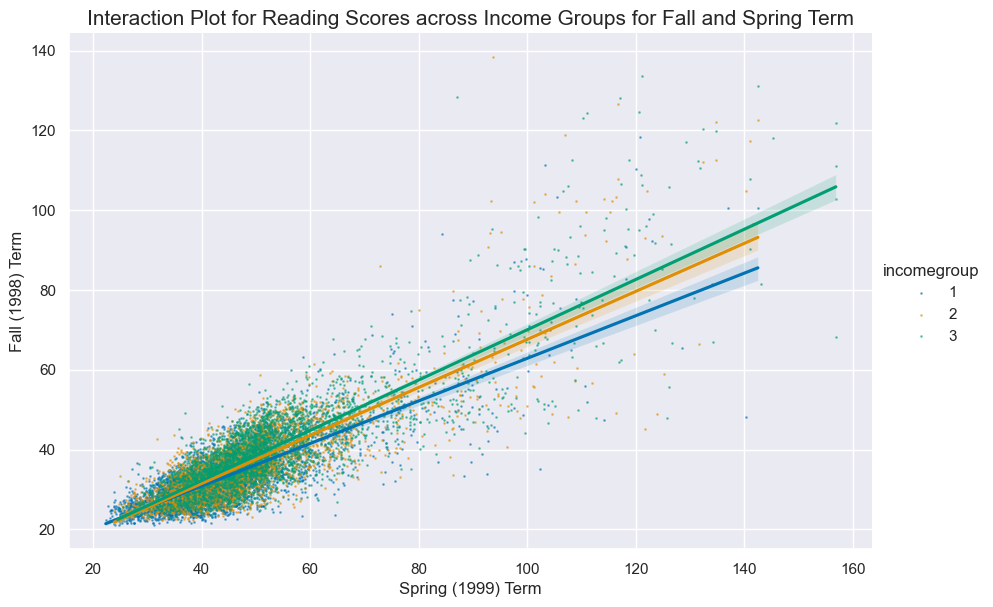

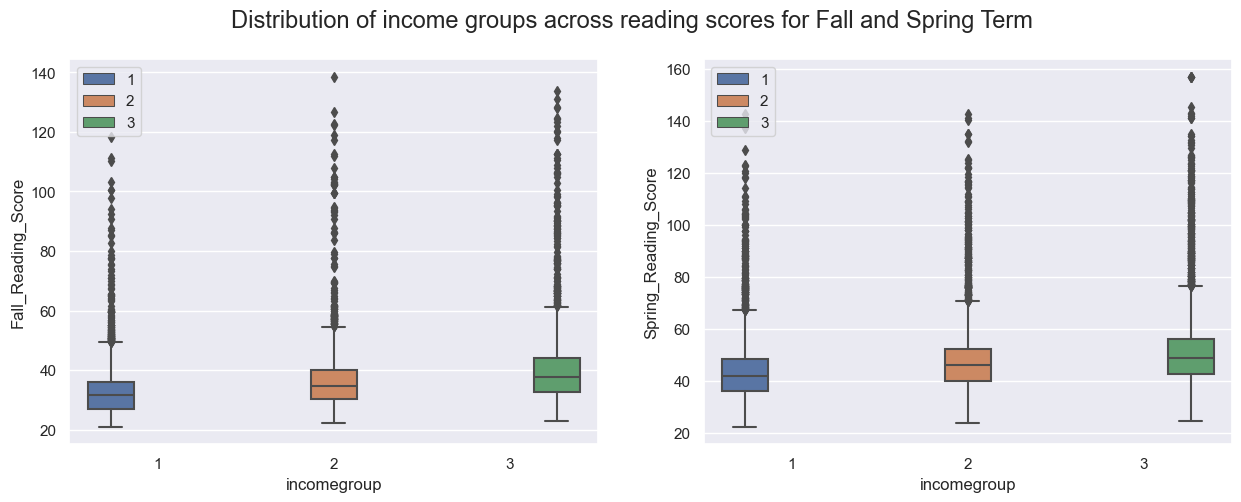

In [20]:
##### One Way ANCOVA - II ######

### To see if the kindergartners' spring reading score is affected by the income group, controlling for the effect of reading scores during fall  ###


# Null hypothesis: Means of all kindergartner's spring reading scores based on each income group are equal after controlling the effect of kindergartners' fall reading scores i.e. adjusted means are equal
# Alternative hypothesis: At least, one kindergartner's spring reading score for an income group is different from other income groups after controlling the effect of kindergartners' fall reading score i.e. adjusted means are not equal

# Subsetting base dataframe for relevant columns
Data_II = Data[['incomegroup', 'Fall_Reading_Score', 'Spring_Reading_Score']]

# Plotting interaction plot 
sns.lmplot(data=Data_II, x='Spring_Reading_Score', y='Fall_Reading_Score', hue='incomegroup', palette='colorblind', 
           height=6, aspect=1.5, scatter_kws={'s': 0.9, 'alpha': 0.5})

# Adding labels
plt.title("Interaction Plot for Reading Scores across Income Groups for Fall and Spring Term", size = 15)
plt.xlabel("Spring (1999) Term")
plt.ylabel("Fall (1998) Term")

# Displaying plot
plt.show();

# Adding space between outputs 
print(" ")
print(" ")
print(" ")

# Distribution of income group and general knowledge scores across terms
# Setting plot dimensions 
fig, axs = plt.subplots(ncols=2, figsize = (15, 5))

# Plotting relevant variables
sns.boxplot(data=Data_II, x="incomegroup", y="Fall_Reading_Score", hue=Data_II.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=Data_II, x="incomegroup", y="Spring_Reading_Score", hue=Data_II.incomegroup.tolist(), ax=axs[1])

# Adding title 
plt.suptitle("Distribution of income groups across reading scores for Fall and Spring Term", size = 17)

# Displaying plot
plt.show();



In [21]:
# Perform the ANCOVA using ols
model_II = ols('Spring_Reading_Score ~ Fall_Reading_Score + incomegroup', data=Data_II).fit()

# Printing the summary of the model
print(model_II.summary())

                             OLS Regression Results                             
Dep. Variable:     Spring_Reading_Score   R-squared:                       0.692
Model:                              OLS   Adj. R-squared:                  0.692
Method:                   Least Squares   F-statistic:                     8929.
Date:                  Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                          23:49:37   Log-Likelihood:                -41675.
No. Observations:                 11933   AIC:                         8.336e+04
Df Residuals:                     11929   BIC:                         8.339e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [22]:
# ANCOVA Results Table using ancova
from pingouin import ancova

ancova(data=Data_II, dv='Spring_Reading_Score', covar='Fall_Reading_Score', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,5.131201e+02,2,4.055660,0.017348,0.00068
1,Fall_Reading_Score,1.547042e+06,1,24455.397576,0.000000,0.67214
2,Residual,7.546256e+05,11929,NaN,NaN,NaN


In [23]:
# Post hoc Testing using Tukey-HSD test
res_II = stat()
res_II.tukey_hsd(df = Data_II, res_var = 'Spring_Reading_Score', xfac_var = 'incomegroup', 
                anova_model = 'Spring_Reading_Score ~ C(incomegroup)')
res_II.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3,2,4.197431,3.429787,4.965074,18.125783,0.001
1,3,1,8.541803,7.814523,9.269083,38.933252,0.001
2,2,1,4.344373,3.631175,5.057570,20.192507,0.001


In [24]:
### Assumption Testing ###

# Assumption 1: Residuals are normally distributed; testing using Shapiro Wilk test

# H0: Data is normally distributed
# H1: Data is not normally distributed

w_II_normality, pvalue_II_normality = stats.shapiro(model_II.resid)

# Defining level of significance
level_of_sig = 0.05
w_II_normality = round(w_II_normality, 3)
pvalue_II_normality = round(pvalue_II_normality, 3)

print('Shapiro-Wilk Test for Normality - (Spring Reading - Fall Reading and Income Groups)')
# Printing results
print(' Test statistic :', w_II_normality)

if(pvalue_II_normality == 0.0):
    print(' p-value < 0.001')
else:
    print(' p-value :',pvalue_II_normality)    


# Adding space between the outputs 
print(' ')

# Printing conclusion of test
if(pvalue_II_normality < level_of_sig):
    print(" Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the data is not normally distributed")
else:
    print(" Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the data is not normally distributed")   

## Adding space between outputs 
print(" ")
print(" ")
print(" ")

# Assumption 2: Homogeneity of variances ; testing using Levene's test as data is not normally distributed

# H0: Groups have equal variances
# H1: Groups do not equal variances

w_II_varhomogeneity, pvalue_II_varhomogeneity = levene(Data_II['Spring_Reading_Score'], model_II.resid)

# Defining level of significance
level_of_sig = 0.05
w_II_varhomogeneity = round(w_II_varhomogeneity, 3)
pvalue_II_varhomogeneity = round(pvalue_II_varhomogeneity, 3)

print("Levene's Test of Homogeneity of Variances - (Spring Reading - Fall Reading and Income Groups)")
# Printing results
print(' Test statistic :', w_II_varhomogeneity)

if(pvalue_II_varhomogeneity == 0.0):
    print(' p-value < 0.001')
else:
    print(' p-value :',pvalue_II_varhomogeneity)    


# Adding space between the outputs 
print(' ')


# Printing conclusion of test
if(pvalue_II_varhomogeneity < level_of_sig):
    print(" Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the variances are not homogeneous")
else:
    print(" Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")   





Shapiro-Wilk Test for Normality - (Spring Reading - Fall Reading and Income Groups)
 Test statistic : 0.912
 p-value < 0.001
 
 Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the data is not normally distributed
 
 
 
Levene's Test of Homogeneity of Variances - (Spring Reading - Fall Reading and Income Groups)
 Test statistic : 1046.733
 p-value < 0.001
 
 Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the variances are not homogeneous


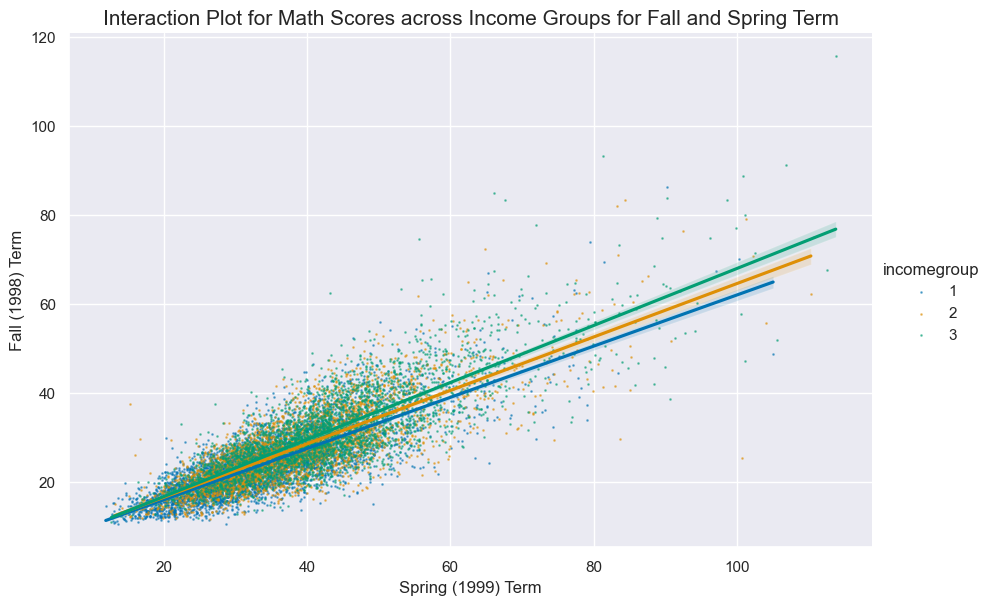

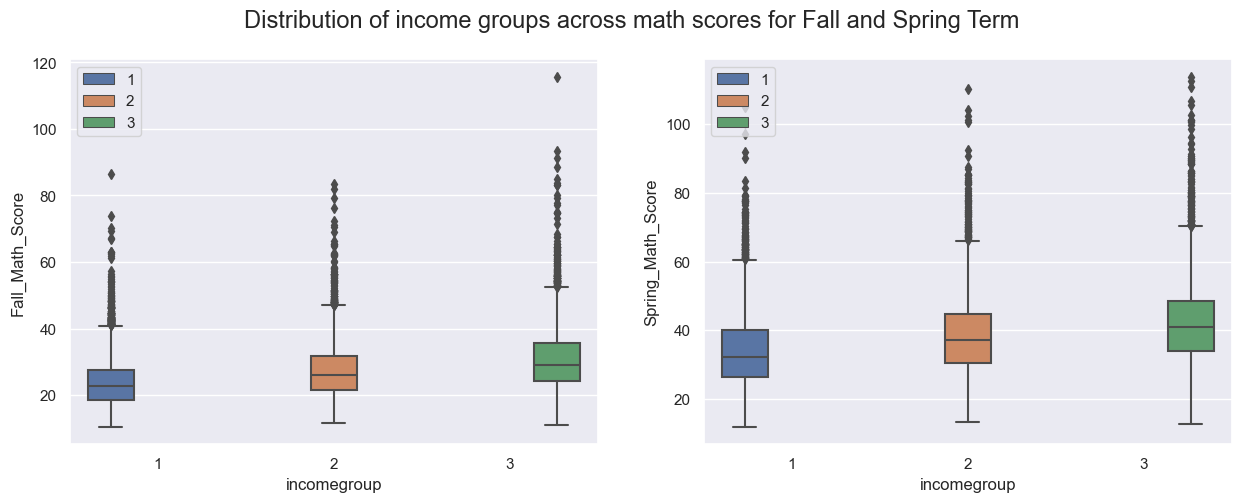

In [25]:
##### One Way ANCOVA - III ######

### To see if the kindergartners' spring math score is affected by the income group, controlling for the effect of math scores during fall  ###


# Null hypothesis: Means of all kindergartner's spring math scores based on each income group are equal after controlling the effect of kindergartners' fall math scores i.e. adjusted means are equal
# Alternative hypothesis: At least, one kindergartner's spring math score for an income group is different from other income groups after controlling the effect of kindergartners' fall math score i.e. adjusted means are not equal

# Subsetting base dataframe for relevant columns
Data_III = Data[['incomegroup', 'Fall_Math_Score', 'Spring_Math_Score']]

# Plotting interaction plot 
sns.lmplot(data=Data_III, x='Spring_Math_Score', y='Fall_Math_Score', hue='incomegroup', palette='colorblind', 
           height=6, aspect=1.5, scatter_kws={'s': 0.9, 'alpha': 0.5})

# Adding labels
plt.title("Interaction Plot for Math Scores across Income Groups for Fall and Spring Term", size = 15)
plt.xlabel("Spring (1999) Term")
plt.ylabel("Fall (1998) Term")

# Displaying plot
plt.show();

# Adding space between outputs 
print(" ")
print(" ")
print(" ")

# Distribution of income group and general knowledge scores across terms
# Setting plot dimensions 
fig, axs = plt.subplots(ncols=2, figsize = (15, 5))

# Plotting relevant variables
sns.boxplot(data=Data_III, x="incomegroup", y="Fall_Math_Score", hue=Data_III.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=Data_III, x="incomegroup", y="Spring_Math_Score", hue=Data_III.incomegroup.tolist(), ax=axs[1])

# Adding title 
plt.suptitle("Distribution of income groups across math scores for Fall and Spring Term", size = 17)

# Displaying plot
plt.show();



In [26]:
# Perform the ANCOVA using ols
model_III = ols('Spring_Math_Score ~ Fall_Math_Score + incomegroup', data=Data_III).fit()

# Printing the summary of the model
print(model_III.summary())

                            OLS Regression Results                            
Dep. Variable:      Spring_Math_Score   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:49:38   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.2011      0.199  

In [27]:
# ANCOVA Results Table using ancova
from pingouin import ancova

ancova(data=Data_III, dv='Spring_Math_Score', covar='Fall_Math_Score', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,Fall_Math_Score,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [28]:
# Post hoc Testing using Tukey-HSD test
res_III = stat()
res_III.tukey_hsd(df = Data_III, res_var = 'Spring_Math_Score', xfac_var = 'incomegroup', 
                anova_model = 'Spring_Math_Score ~ C(incomegroup)')
res_III.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3,2,3.947206,3.311597,4.582815,20.586025,0.001
1,3,1,8.528846,7.926658,9.131034,46.949485,0.001
2,2,1,4.581640,3.991112,5.172168,25.718969,0.001


In [29]:
### Assumption Testing ###

# Assumption 1: Residuals are normally distributed; testing using Shapiro Wilk test

# H0: Data is normally distributed
# H1: Data is not normally distributed

w_III_normality, pvalue_III_normality = stats.shapiro(model_III.resid)

# Defining level of significance
level_of_sig = 0.05
w_III_normality = round(w_III_normality, 3)
pvalue_III_normality = round(pvalue_III_normality, 3)

print('Shapiro-Wilk Test for Normality - (Spring Math - Fall Math and Income Groups)')
# Printing results
print(' Test statistic :', w_III_normality)

if(pvalue_III_normality == 0.0):
    print(' p-value < 0.001')
else:
    print(' p-value :',pvalue_III_normality)    


# Adding space between the outputs 
print(' ')

# Printing conclusion of test
if(pvalue_III_normality < level_of_sig):
    print(" Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the data is not normally distributed")
else:
    print(" Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the data is not normally distributed")   

## Adding space between outputs 
print(" ")
print(" ")
print(" ")

# Assumption 2: Homogeneity of variances ; testing using Levene's test as data is not normally distributed

# H0: Groups have equal variances
# H1: Groups do not equal variances

w_III_varhomogeneity, pvalue_III_varhomogeneity = levene(Data_III['Spring_Math_Score'], model_III.resid)

# Defining level of significance
level_of_sig = 0.05
w_III_varhomogeneity = round(w_III_varhomogeneity, 3)
pvalue_III_varhomogeneity = round(pvalue_III_varhomogeneity, 3)

print("Levene's Test of Homogeneity of Variances - (Spring Math - Fall Math and Income Groups) ")
# Printing results
print(' Test statistic :', w_III_varhomogeneity)

if(pvalue_III_varhomogeneity == 0.0):
    print(' p-value < 0.001')
else:
    print(' Sp-value :',pvalue_III_varhomogeneity)    


# Adding space between the outputs 
print(' ')


# Printing conclusion of test
if(pvalue_III_varhomogeneity < level_of_sig):
    print(" Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the variances are not homogeneous")
else:
    print(" Conclusion : Since the p-value is greater than alpha, we do not reject the null hypothesis and conclude that there is not enough evidence to prove that the variances are not homogeneous")   





Shapiro-Wilk Test for Normality - (Spring Math - Fall Math and Income Groups)
 Test statistic : 0.965
 p-value < 0.001
 
 Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the data is not normally distributed
 
 
 
Levene's Test of Homogeneity of Variances - (Spring Math - Fall Math and Income Groups) 
 Test statistic : 2324.281
 p-value < 0.001
 
 Conclusion : Since the p-value is less than alpha, we reject the null hypothesis and conclude that the variances are not homogeneous
